In [26]:
from pyclustertend import vat, ivat, hopkins
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm import tqdm
from matplotlib import pyplot as plt

In [27]:
# Load data
df_path = "/home/njbarry/punim1896/coresets/repositories/HRNet-Semantic-Segmentation-Coreset/plots/label_counts_df.csv"
Seg_Class_Counts = pd.read_csv(df_path)

## Clustering

In [28]:

# KMeans Clustering
clustering_model = KMeans(
    n_clusters=20   # Number of clusters arbitrarily chosen
)  

# Fitting Model
clustering_model.fit(Seg_Class_Counts.T)

/home/njbarry/punim1896/coresets/repositories/HRNet-Semantic-Segmentation-Coreset/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

## Principal Component Visualisation

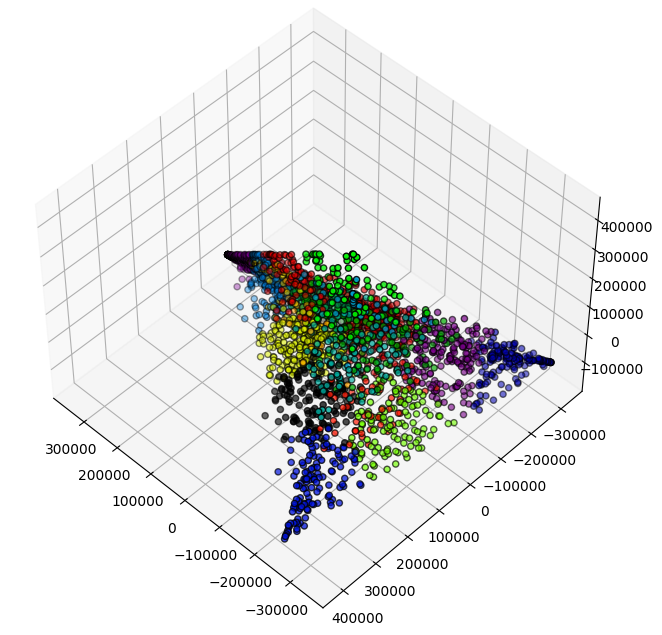

In [29]:

pca = PCA(n_components=3)
X = pca.fit_transform(Seg_Class_Counts.T)
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()

ax.scatter(
    X[:, 0], X[:, 1], X[:, 2], c=clustering_model.labels_, cmap=plt.cm.nipy_spectral, edgecolor="k"
)
# plot_dir = "/home/njbarry/punim1896/coresets/repositories/HRNet-Semantic-Segmentation-Coreset/plots/clustering_scatter"
# plt.savefig(plot_dir)

## Clustering Tendency

In [30]:
# Scale data
X = scale(Seg_Class_Counts.T)

In [31]:
# Hopkins values

"""
A statistical test which allow to guess if the data follow an uniform distribution. If the test is positve (an hopkins score which tends to 0) it means that the data is not uniformly distributed. Hence clustering can be useful to classify the observations. However, if the score is too high (above 0.3 for exemple); the data is uniformly distributed and clustering can’t be really useful for the problem at hand.
"""
sampling_sizes = list(range(50,1200,50))
hopkins_values = []
for samplingsize in sampling_sizes:
    hopkins_values.append(hopkins(X, samplingsize))

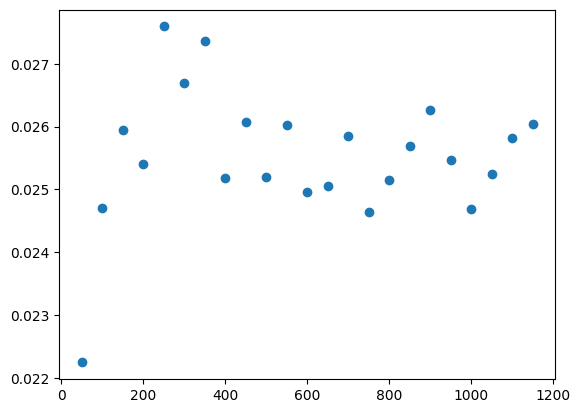

In [32]:
plt.scatter(x=sampling_sizes, y=hopkins_values)

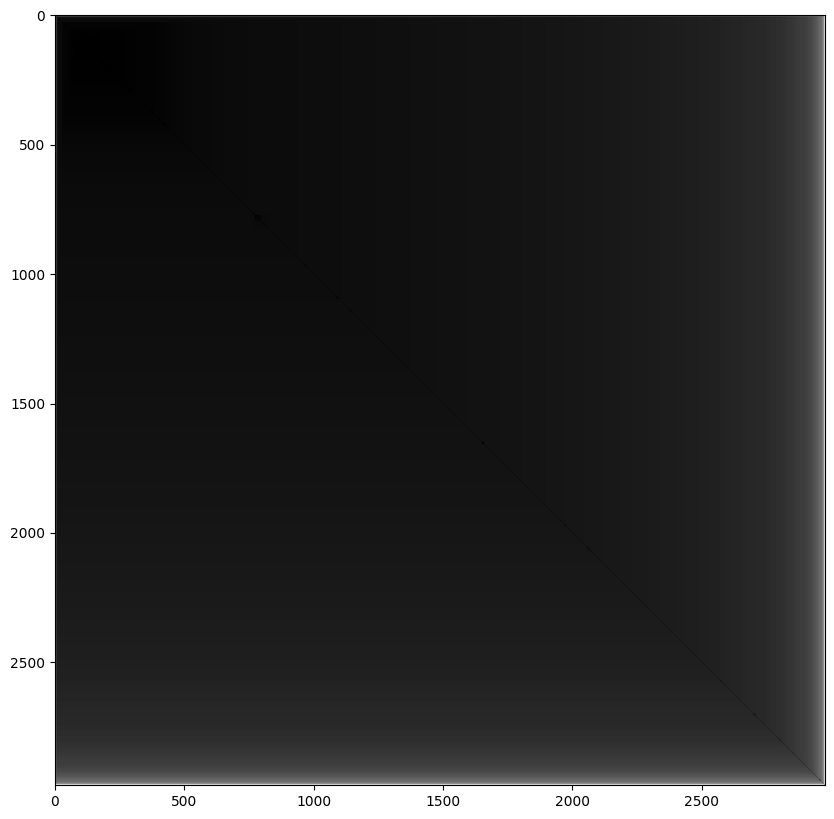

In [33]:
# iVAT algorithm
ivat(X)

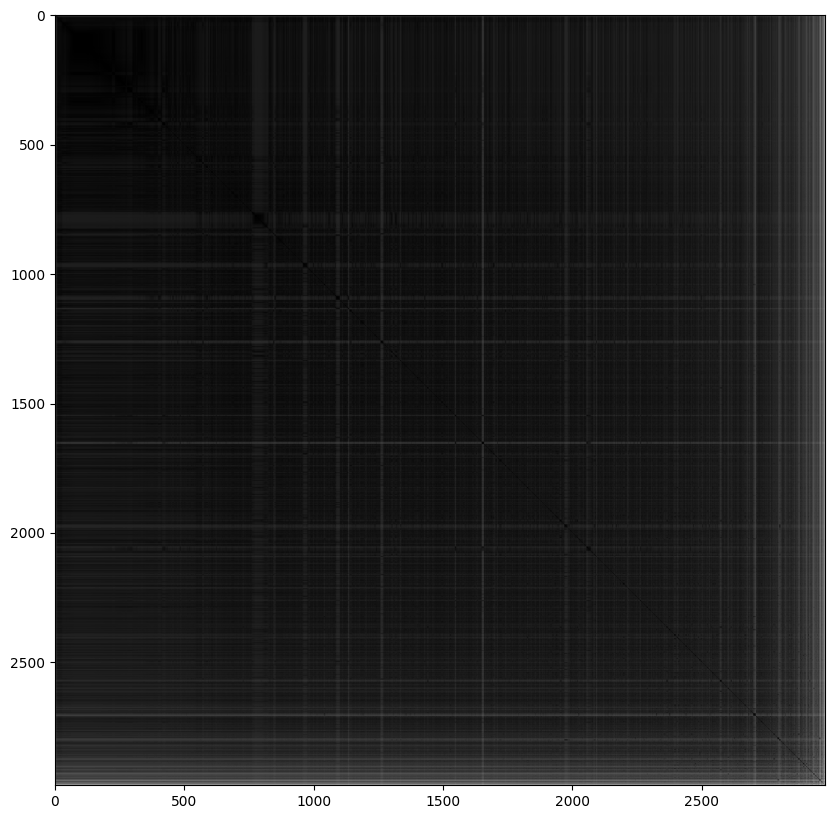

In [34]:
#VAT algorithm
vat(X)

## Projection across principal axes

In [58]:
components = list(range(1,20))
sampling_sizes = list(range(50,1200,50))
component_stats = []

for c in components:
    pca = PCA(n_components=3)
    x = pca.fit_transform(Seg_Class_Counts.T)
    x = scale(x)
    
    hopkins_values = []
    for samplingsize in sampling_sizes:
        hopkins_values.append(hopkins(x, samplingsize))
    
    component_stats.append((np.mean(hopkins_values), np.var(hopkins_values)))

<ErrorbarContainer object of 3 artists>

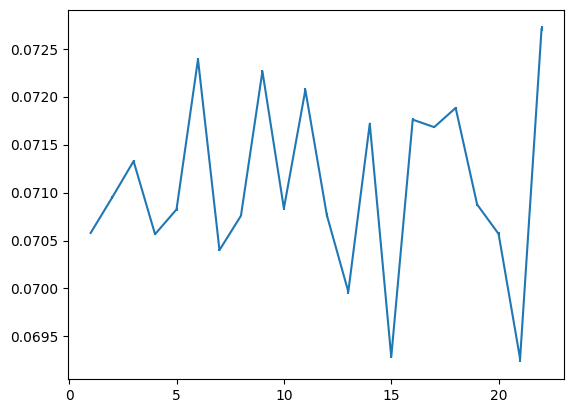

In [59]:
means, variances = zip(*component_stats)
plt.errorbar(x=components, y=means, yerr=variances)

In [56]:
Seg_Class_Counts.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,0.0,1.0,2.0,5.0,7.0,8.0,9.0,11.0,13.0,18.0,255.0,10.0,4.0,6.0,17.0,3.0,12.0,15.0,14.0,16.0
aachen_000000_000019_gtFine_labelIds,258818.0,13446.0,140352.0,6938.0,11297.0,43196.0,26196.0,1276.0,17597.0,675.0,4497.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen_000001_000019_gtFine_labelIds,0.0,0.0,323860.0,8669.0,0.0,76397.0,0.0,0.0,0.0,0.0,0.0,115362.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen_000002_000019_gtFine_labelIds,137056.0,6734.0,191179.0,6327.0,14665.0,4693.0,0.0,1240.0,131706.0,0.0,11663.0,0.0,18929.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0
aachen_000003_000019_gtFine_labelIds,65167.0,5849.0,301144.0,2028.0,4319.0,0.0,0.0,0.0,143290.0,0.0,39.0,0.0,0.0,2452.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zurich_000117_000019_gtFine_labelIds,128801.0,140792.0,5458.0,4750.0,2775.0,154036.0,0.0,0.0,4276.0,543.0,2945.0,7789.0,0.0,258.0,34.0,40850.0,181.0,30800.0,0.0,0.0
zurich_000118_000019_gtFine_labelIds,67236.0,27917.0,84153.0,8685.0,215.0,255619.0,0.0,0.0,27334.0,0.0,7922.0,43081.0,0.0,1912.0,88.0,0.0,126.0,0.0,0.0,0.0
zurich_000119_000019_gtFine_labelIds,164988.0,65974.0,110222.0,11255.0,6439.0,54260.0,1491.0,3140.0,11146.0,0.0,36715.0,3922.0,4955.0,0.0,4172.0,7621.0,808.0,37180.0,0.0,0.0
zurich_000120_000019_gtFine_labelIds,3253.0,9873.0,138950.0,11644.0,3380.0,272974.0,0.0,1720.0,12893.0,0.0,21483.0,48118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
